# 40: Image Transformations with Torchvision

## 🎯 Objective
Raw images are rarely ready for neural networks immediately. They often require resizing, normalizing, or color conversion. In this notebook, we master **`torchvision.transforms`** to build efficient data preprocessing pipelines. We will work with the famous **CIFAR-10** dataset, creating a sequence of operations to automatically transform images as they are loaded into memory.

## 📚 Key Concepts
* **Torchvision:** The official PyTorch library containing popular datasets, model architectures, and image transformation tools.
* **CIFAR-10:** A standard benchmark dataset consisting of 60,000 32x32 color images in 10 classes (airplanes, cars, birds, etc.).
* **Transforms (`torchvision.transforms`):** Functions that perform common image operations (cropping, resizing, normalizing).
* **`T.Compose`:** A container that chains multiple transforms together so they run sequentially.
* **`ToTensor()`:** A crucial transform that converts images (numpy arrays or PIL images) into PyTorch Tensors and scales pixel values from [0, 255] to [0, 1].

## 1. Import Libraries

In addition to our standard PyTorch imports, we now include `torchvision` and its `transforms` module (aliased as `T`). This module is the toolbox we use for all image modifications.

In [1]:
# import libraries
import numpy as np
import torch

# NEW!
import torchvision
import torchvision.transforms as T

import matplotlib.pyplot as plt

## 2. Loading a Dataset

Deep learning requires data. `torchvision.datasets` provides easy access to many standard research datasets. We will download and load **CIFAR-10**.

**Note:** The argument `download=True` checks if the data exists locally; if not, it downloads it. `root` specifies the folder where data will be stored.

In [2]:
# The list of datasets that come with torchvision: https://pytorch.org/vision/stable/index.html

# download the CIFAR10 dataset
cdata = torchvision.datasets.CIFAR10(root='cifar10', download=True)

print(cdata)

100%|██████████| 170M/170M [00:04<00:00, 39.4MB/s] 


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar10
    Split: Train


## 3. Inspecting the Data

Before training, always inspect your data. We check:
1.  **Shape:** How many images? What are the dimensions? (N, H, W, C)
2.  **Classes:** What are the categories?
3.  **Targets:** The labels (numerical indices corresponding to classes).

In [3]:
# check out the shape of the dataset
print( cdata.data.shape )

# the unique categories
print( cdata.classes )

# targets is a list of targets converted to ints
print( len(cdata.targets) )

(50000, 32, 32, 3)
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
50000


## 4. Visualizing the Dataset

Let's visualize a grid of random images from the dataset to verify the integrity of the data and the labels.

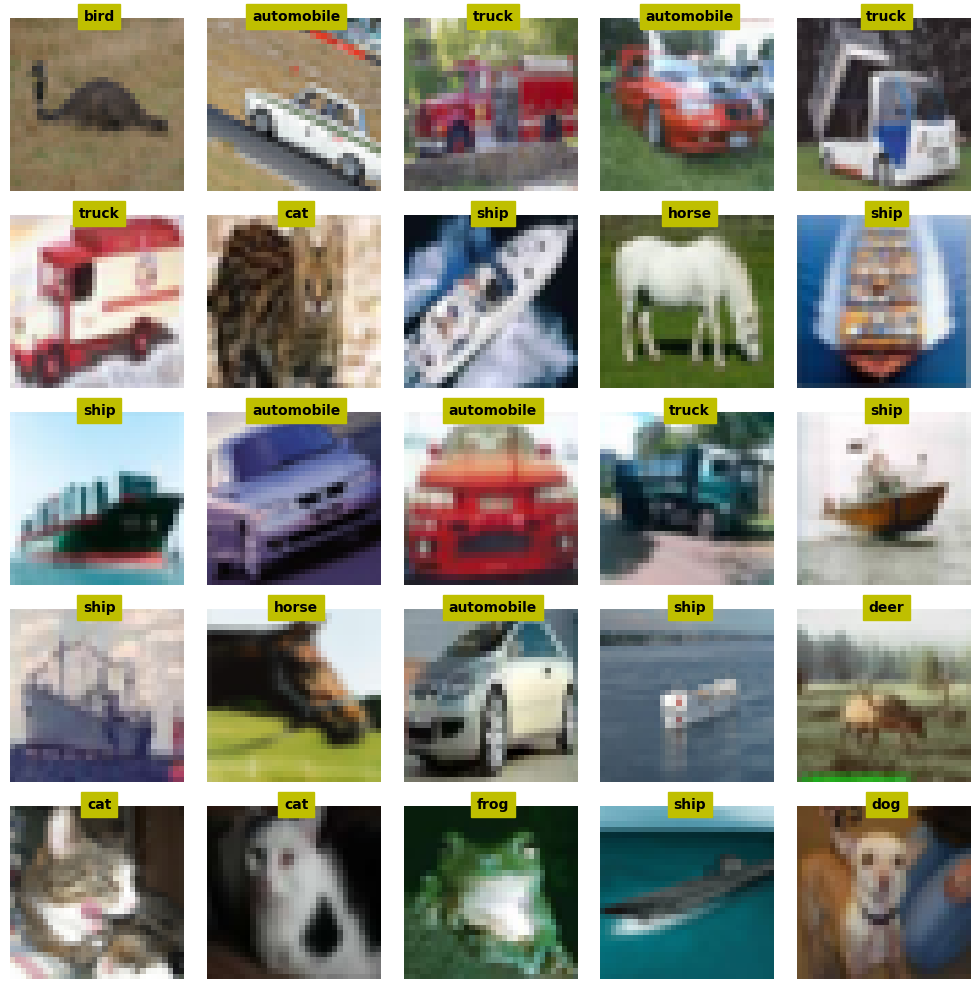

In [4]:
# inspect a few random images

fig,axs = plt.subplots(5,5,figsize=(10,10))

for ax in axs.flatten():

  # select a random picture
  randidx = np.random.choice(len(cdata.targets))

  # extract that image
  pic = cdata.data[randidx,:,:,:]
  # and its label
  label = cdata.classes[cdata.targets[randidx]]

  # and show!
  ax.imshow(pic)
  ax.text(16,0,label,ha='center',fontweight='bold',color='k',backgroundcolor='y')
  ax.axis('off')

plt.tight_layout()
plt.show()

## 5. Creating a Transformation Pipeline

Here we define a sequence of transformations using `T.Compose`. 

### The Pipeline
1.  **`ToTensor()`:** Converts the image from a numpy array (H, W, C) with values [0-255] to a PyTorch Tensor (C, H, W) with values [0-1].
2.  **`Resize(32*4)`:** Increases the image size to 128x128 pixels.
3.  **`Grayscale(num_output_channels=1)`:** Converts the color image to black and white.

**Important:** Assigning `cdata.transform = Ts` tells the dataset object to apply these transforms *on the fly* whenever we request an item. It does **not** change the stored data in memory, which allows us to keep the original data intact while experimenting with different augmentations.

In [5]:
Ts = T.Compose([ T.ToTensor(),
                 T.Resize(32*4),
                 T.Grayscale(num_output_channels=1)
                 ])

# include the transform in the dataset
cdata.transform = Ts

# you can also apply the transforms immediately when loading in the data
# cdata = torchvision.datasets.CIFAR10(root='cifar10', download=True, transform=Ts)


# Important! Adding a transform doesn't change the image data:
print(cdata.data[123,:,:,:].shape)

(32, 32, 3)


## 6. Applying and Visualizing Transforms

We can apply transforms in two ways:
1.  **Externally:** Manually pass an image into the function `Ts(image)`.
2.  **Embedded:** Use the dataset's internal mechanism `cdata.transform(image)`.

Below, we visualize the original image (small, colored) side-by-side with the transformed versions (large, grayscale).

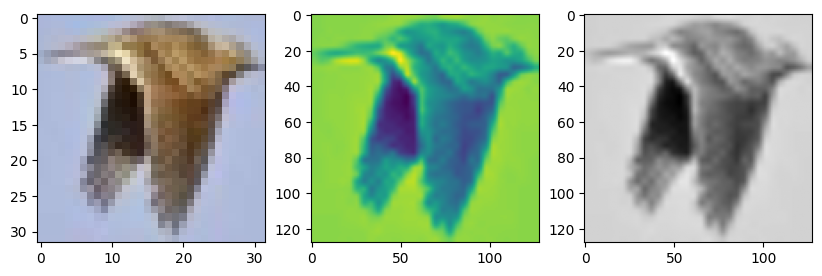

In [6]:
# apply the transform

# option 1a: apply the transform "externally" to an image
img1 = Ts( cdata.data[123,:,:,:] )

# option 1b: use the embedded transform
img2 = cdata.transform( cdata.data[123,:,:,:] )

# let's see what we've done!
fig,ax = plt.subplots(1,3,figsize=(10,3))
ax[0].imshow(cdata.data[123,:,:,:])
ax[1].imshow(torch.squeeze(img1))
ax[2].imshow(torch.squeeze(img2),cmap='gray')

plt.show()